In [0]:
from fastai.vision import *

Download Pictures

In [0]:
folder = 'NintendoSwitch'
file = 'urls_NintendoSwitch.csv'

In [0]:
folder = 'NintendoWiiU'
file = 'urls_NintendoWiiU.csv'

In [0]:
folder = 'NintendoWii'
file = 'urls_NintendoWii.csv'

In [0]:
folder = 'NintendoGamecube'
file = 'urls_NintendoGamecube.csv'

In [0]:
folder = 'Xbox360'
file = 'urls_Xbox360.csv'

In [0]:
folder = 'XboxOne'
file = 'urls_XboxOne.csv'

In [0]:
folder = 'Playstation1'
file = 'urls_Playstation1.csv'

In [0]:
folder = 'Playstation2'
file = 'urls_Playstation2.csv'

In [0]:
folder = 'Playstation3'
file = 'urls_Playstation3.csv'

In [0]:
folder = 'Playstation4'
file = 'urls_Playstation4.csv'

In [0]:
path = Path('drive/My Drive/BioInf/Consoles')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
classes = ['NintendoSwitch', 'NintendoWiiU', 'NintendoWii', 'NintendoGamecube', 'Xbox360', 'XboxOne', 'Playstation1', 'Playstation2', 'Playstation3', 'Playstation4']

In [0]:
download_images(path/file, dest, max_pics=200)

In [0]:
for c in classes:
  print(c)
  verify_images(path/c, delete=True, max_size=500)

NintendoSwitch


NintendoWiiU


NintendoWii


NintendoGamecube


Xbox360


XboxOne


Playstation1


Playstation2


Playstation3


Playstation4


View Data

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
data.classes

['NintendoGamecube',
 'NintendoSwitch',
 'NintendoWii',
 'NintendoWiiU',
 'Playstation1',
 'Playstation2',
 'Playstation3',
 'Playstation4',
 'Xbox360',
 'XboxOne']

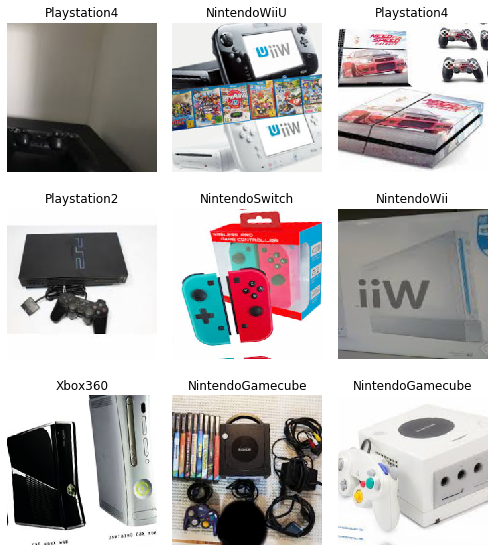

In [0]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

NameError: ignored

Train Model

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

NameError: ignored

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.963355,1.664991,0.518750,00:08
1,2.051159,1.046180,0.312500,00:07
2,1.514070,0.985347,0.287500,00:07
3,1.198106,0.959377,0.268750,00:07


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


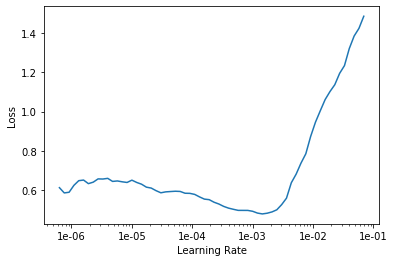

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(3e-4,3e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.954598,2.406934,0.518750,00:08
1,1.036028,1.366336,0.400000,00:08


In [0]:
learn.save('stage-2')

Interpretation

In [0]:
learn.load('stage-2')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

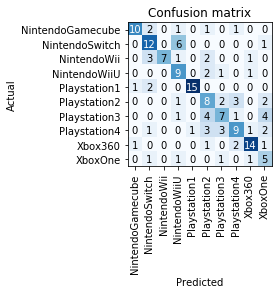

In [0]:
interp.plot_confusion_matrix()

After Cleaning up the images manually

In [1]:
from fastai.vision import *
path = Path('drive/My Drive/BioInf/Consoles')
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [3]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,3.462265,2.241347,0.720588,01:39
1,2.621404,0.994243,0.286765,00:11
2,1.922693,0.789721,0.235294,00:08
3,1.509880,0.608499,0.191176,00:08
4,1.216746,0.523841,0.191176,00:08
5,1.028385,0.485972,0.183824,00:08
6,0.869499,0.482361,0.176471,00:08
7,0.763319,0.489476,0.183824,00:08


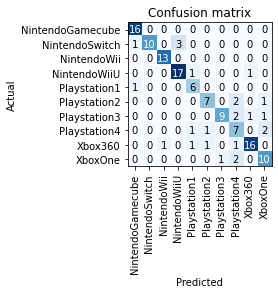

In [4]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [0]:
learn.save('cleanedDatav1')

In [12]:
learn.load('cleanedDatav1')

Learner(data=ImageDataBunch;

Train: LabelList (544 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
NintendoSwitch,NintendoSwitch,NintendoSwitch,NintendoSwitch,NintendoSwitch
Path: drive/My Drive/BioInf/Consoles;

Valid: LabelList (136 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Playstation4,Playstation3,NintendoWiiU,Xbox360,NintendoWiiU
Path: drive/My Drive/BioInf/Consoles;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1

In [0]:
learn.unfreeze()

In [8]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


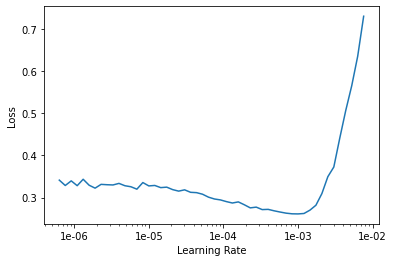

In [9]:
learn.recorder.plot()

In [17]:
learn.fit_one_cycle(3, max_lr=slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.092922,0.372387,0.132353,00:09
1,0.077369,0.369244,0.132353,00:09
2,0.070038,0.370129,0.125000,00:09


In [0]:
learn.save('cleanedDatav2')

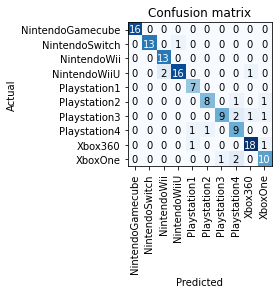

In [19]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [0]:
learn.export()